<a href="https://colab.research.google.com/github/e96031413/TensorFlow_Learning_2020/blob/master/Pokemon_Combat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
# 讀取寶可夢數據
pokemon_df = pd.read_csv('pokemon.csv')  
pokemon_df.tail()  # 顯示前5筆資料

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [5]:
# 將"#"數據設定為索引值：
pokemon_df= pokemon_df.set_index("#")  # 將索引設定為'#'列
pokemon_df.head()  # 顯示前5筆資料

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
# 讀取對戰數據
combats_df = pd.read_csv('combats.csv')  
combats_df.head()  # 顯示前5筆資料

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [8]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [9]:
pokemon_df["Type 2"].value_counts(dropna =False)

# 注意Type 2為NaN的數量有386個

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Water        14
Ghost        14
Rock         14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [10]:
# 填補缺失數據：使用empty將缺失的欄位填上。
pokemon_df["Type 2"].fillna('empty',inplace=True)
pokemon_df["Type 2"].value_counts()

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Water        14
Rock         14
Ghost        14
Ice          14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [11]:
print(combats_df.dtypes)  # 顯示對戰數據的資料型態
print('-' * 30)
print(pokemon_df.dtypes)  # 顯示寶可夢數據的資料型態

# 注意Type1、Type2、Legendary這三個屬性，必須轉換成可分析的Data Type

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object
------------------------------
#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [12]:
# 轉換數據格式
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category')  # 將'Type 1'轉成category型態
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype('category')  # 將'Type 2'轉成category型態
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype('int')  # 將'Legendary'轉成int型態
pokemon_df.dtypes  # 顯示目前寶可用數據集資料型態

#                int64
Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int64
dtype: object

In [13]:
# 將寶可夢的Type1和Type2轉為One-hot Encoding表示：
df_type1_one_hot = pd.get_dummies(pokemon_df['Type 1'])  # 取得'Type 1'數據的One-hot編碼
df_type1_one_hot.head()  # 顯示前5筆資料

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_type2_one_hot = pd.get_dummies(pokemon_df['Type 2'])  # 取得'Type 2'數據的One-hot編碼
df_type2_one_hot.head()  # 顯示前5筆資料

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
# 將兩組One-hot Encoding合併回數據集：
# 將上方兩個One-hot編碼資料加起來，將缺少的值補0，並轉呈int64型態
combine_df_one_hot = df_type1_one_hot.add(df_type2_one_hot, fill_value=0).astype('int64')
# 將顯示列數設定為30，不然會有部份資料無法顯示
pd.options.display.max_columns = 30
# 將One-hot編碼資料加到寶可夢數據中
pokemon_df = pokemon_df.join(combine_df_one_hot)
pokemon_df.head()  # 顯示前5筆資料

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,...,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
# 將寶可夢屬性轉為數值表示（0, 1, 2, …18）：透過cat.categories查詢類別的標籤。
dict(enumerate(pokemon_df['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

In [17]:
#　透過cat.codes可以取得類別的編碼值。
pokemon_df['Type 2'].cat.codes.head(10)

0    13
1    13
2    13
3    13
4    18
5    18
6     7
7     2
8     7
9    18
dtype: int8

In [18]:
# 用數值表示（0, 1, 2…18）取代原本的標籤值：
pokemon_df['Type 1'] = pokemon_df['Type 1'].cat.codes
pokemon_df['Type 2'] = pokemon_df['Type 2'].cat.codes
pokemon_df.head()  # 顯示前5筆資料

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,...,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
0,1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
# 將沒有使用到的資料剔除（name）：
pokemon_df.drop('Name', axis='columns', inplace=True)
pokemon_df.head()  # 顯示前5筆資料

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
0,1,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,3,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,4,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,5,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
# 將寶可夢對戰數據中勝利方的表示改為0與1：
# apply方法第一個參數為自訂function,而axis為columns的話會將數據一行一
# 行放入function中處理，最後將所有結果組合成一個數據結構返回。
combats_df['Winner'] = combats_df.apply(lambda x: 0 if x.Winner == x.First_pokemon else 1, axis='columns')
combats_df.head()  # 顯示前5筆資料

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [0]:
data_num = combats_df.shape[0]
# 取得一筆與data數量相同的亂數索引，主要目的是用於打散資料
indexes = np.random.permutation(data_num)
# 並將亂數索引值分為Train、validation和test分為，這裡劃分比例為6:2:2
train_indexes = indexes[:int(data_num *0.6)]
val_indexes = indexes[int(data_num *0.6):int(data_num *0.8)]
test_indexes = indexes[int(data_num *0.8):]
# 透過上方的索引值從對戰數據中提取資料
train_data = combats_df.loc[train_indexes]
val_data = combats_df.loc[val_indexes]
test_data = combats_df.loc[test_indexes]

In [0]:
pokemon_df['Type 1'] = pokemon_df['Type 1'] / 19
pokemon_df['Type 2'] = pokemon_df['Type 2'] / 19

In [23]:
mean = pokemon_df.loc[:, 'HP':'Generation'].mean()  # 計算平均值
std = pokemon_df.loc[:, 'HP':'Generation'].std()  # 計算標準差
# 標準化數據
pokemon_df.loc[:,'HP':'Generation'] = (pokemon_df.loc[:,'HP':'Generation']-mean)/std
pokemon_df.head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
0,1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
x_train_index = np.array(train_data.drop('Winner', axis='columns'))
x_val_index = np.array(val_data.drop('Winner', axis='columns'))
x_test_index = np.array(test_data.drop('Winner', axis='columns'))
print(x_train_index)
# 準備訓練目標
y_train = np.array(train_data['Winner'])
y_val = np.array(val_data['Winner'])
y_test = np.array(test_data['Winner'])
# 準備兩種輸入數據：
## 第一種：寶可夢的屬性為數值表示。
# 取得寶可夢的能力值
pokemon_data_normal = np.array(pokemon_df.loc[:, :'Legendary'])
print(pokemon_data_normal.shape)
# 透過前面準備的索引產生輸入數據
x_train_normal = pokemon_data_normal[x_train_index -1].reshape((-1, 20))
x_val_normal = pokemon_data_normal[x_val_index -1].reshape((-1, 20))
x_test_normal = pokemon_data_normal[x_test_index -1].reshape((-1, 20))
print(x_train_normal.shape)
## 第二種：寶可夢的屬性為One-hot encoding表示。
# 取得寶可夢的能力值
pokemon_data_one_hot = np.array(pokemon_df.loc[:, 'HP':])
print(pokemon_data_one_hot.shape)
# 透過前面準備的索引產生輸入數據
x_train_one_hot = pokemon_data_one_hot[x_train_index -1].reshape((-1, 54))
x_val_one_hot = pokemon_data_one_hot[x_val_index -1].reshape((-1, 54))
x_test_one_hot = pokemon_data_one_hot[x_test_index -1].reshape((-1, 54))
print(x_train_one_hot.shape)

[[680 483]
 [ 24 444]
 [110 401]
 ...
 [528 235]
 [441 436]
 [287 673]]
(800, 11)
(33000, 20)
(800, 27)
(30000, 54)


In [26]:
inputs = keras.Input(shape=(20, ))  # 建立輸入層
# 加入全層全連接層，每一層輸出使用ReLU激活函數，並加上Dropout(每次丟棄30%)
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
# 最後一層全連接層，輸出維度類別數量，並且使用sigmoid激活函數
# outputs = layers.Dense(1, activation='sigmoid')(x)
outputs = layers.Dense(1)(x)
# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()  # 顯示網路架構
model_dir = 'lab3-logs/models'  # 設定儲存權重目錄
os.makedirs(model_dir)  # 創建儲存權重目錄

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1344      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0   

FileExistsError: ignored

In [27]:
# 儲存訓練記錄檔
log_dir = os.path.join('lab3-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', monitor='val_binary_accuracy',save_best_only=True, mode='max')
model_1.compile(keras.optimizers.Adam(),
               # loss=keras.losses.BinaryCrossentropy(), 
               loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               metrics=[keras.metrics.BinaryAccuracy()])
history_1 = model_1.fit(x_train_normal, y_train, 
                batch_size=64 ,
                epochs=200, 
                validation_data=(x_val_normal, y_val),
                callbacks=[model_cbk, model_mckp])

ValueError: ignored

In [28]:
inputs = keras.Input(shape=(54, ))  # 建立輸入層
# 加入全層全連接層，每一層輸出使用ReLU激活函數，並加上Dropout(每次丟棄30%)
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
# 最後一層全連接層，輸出維度為類別數量，並且使用sigmoid激活函數
outputs = layers.Dense(1)(x)
# outputs = layers.Dense(1, activation='sigmoid')(x)
# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model_2 = keras.Model(inputs, outputs, name='model-2')
model_2.summary()  # 顯示網路架構
# 儲存訓練記錄檔
log_dir = os.path.join('lab3-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5', 
                                         monitor='val_binary_accuracy', save_best_only=True, mode='max')
model_2.compile(keras.optimizers.Adam(), 
               # loss=keras.losses.BinaryCrossentropy(), 
               loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               metrics=[keras.metrics.BinaryAccuracy()])
history_2 = model_2.fit(x_train_one_hot, y_train, 
                    batch_size=64 ,
                    epochs=200, 
                    validation_data=(x_val_one_hot, y_val), 
                    callbacks=[model_cbk, model_mckp])

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                3520      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0   

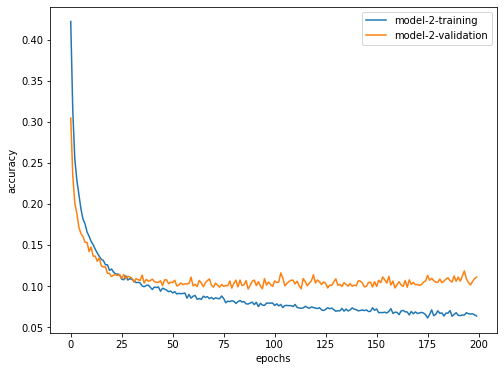

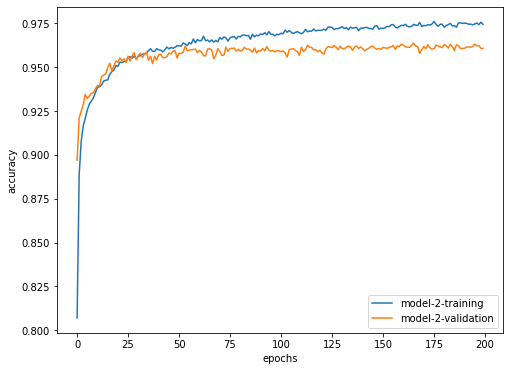

In [34]:
plt.figure(figsize=(8, 6))
#plt.plot(history_1.history['loss'], label='model-1-training')
#plt.plot(history_1.history['val_loss'], label='model-1-validation')
plt.plot(history_2.history['loss'], label='model-2-training')
plt.plot(history_2.history['val_loss'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.figure(figsize=(8, 6))
#plt.plot(history_1.history['binary_accuracy'], label='model-1-training')
#plt.plot(history_1.history['val_binary_accuracy'], label='model-1-validation')
plt.plot(history_2.history['binary_accuracy'], label='model-2-training')
plt.plot(history_2.history['val_binary_accuracy'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()